<a href="https://colab.research.google.com/github/dzulwulann/CustomerPersonality_Prediction/blob/main/Marketing_campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [3]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Importing Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv('/content/drive/MyDrive/RAKAMIN/Predict Customer Personality to boost marketing campaign/marketing_campaign_data.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [7]:
data.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [22]:
data['Income'].describe()

count    2.216000e+03
mean     5.224725e+07
std      2.517308e+07
min      1.730000e+06
25%      3.530300e+07
50%      5.138150e+07
75%      6.852200e+07
max      6.666660e+08
Name: Income, dtype: float64

### Calculating Converstion Rate

In [8]:
#calculating total customer
total_customer = data.shape[0]

In [9]:
#calcualting respons customer
total_conversions = data[data['Response']==1].shape[0]

In [10]:
#converstion rate
conversion_rate = (total_conversions/total_customer)*100

print(f"Conversion Rate: {conversion_rate:.2f}%")

Conversion Rate: 14.91%


From the data we calculated the conversion rate is **14.91%**

# Age vs Conversion Rate

In [11]:
#transform year_birth to age
data['age'] = 2024 - data['Year_Birth']

In [ ]:
data['age'].describe()

count    2240.000000
mean       55.194196
std        11.984069
min        28.000000
25%        47.000000
50%        54.000000
75%        65.000000
max       131.000000
Name: age, dtype: float64

In [12]:
conditions = [
    data['age'] < 40,
    (data['age'] >= 40) & (data['age'] < 65),
    data['age'] >=65
]

# Define the corresponding labels for each group
labels = ['Young Adult', 'middle-aged', 'Elder']

In [13]:
# Create the age group column
data['age_group'] = np.select(conditions, labels, default='Other')

In [14]:
conversion_rates = data.groupby('age_group')['Response'].mean() * 100

In [15]:
conversion_rates = conversion_rates.reset_index()
conversion_rates

,age_group,Response
0,Elder,14.912281
1,Young Adult,16.289593
2,middle-aged,14.699793


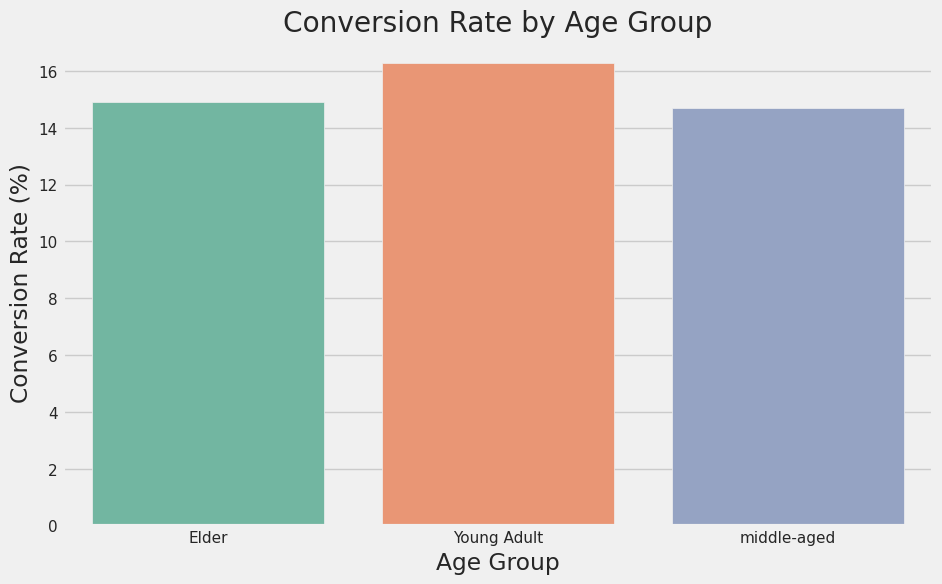

In [16]:
#plotting conversion rate by age group
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='Response', data=conversion_rates, palette='Set2')
plt.title('Conversion Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Conversion Rate (%)')
plt.show()

From the chart, it's clear that the 'Young Adult' group boasts the highest conversion rate. This indicates that customers under 40 years old are significantly more responsive to our campaign efforts compared to other age groups.

## Income vs Response

We want to see how the income give effect to the marketing response

In [25]:
#Filtering the data
data_response = data[data['Response']==1]

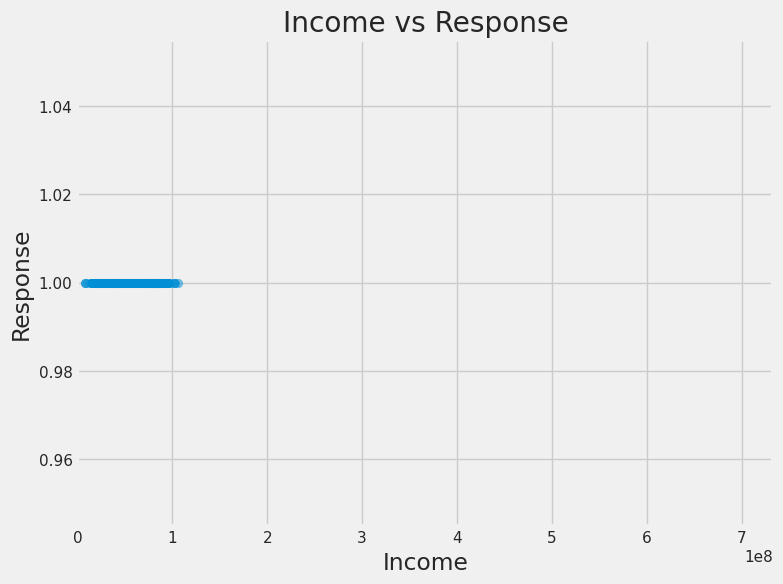

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(data_response['Income'], data_response['Response'], alpha=0.5)
plt.title('Income vs Response')
plt.xlabel('Income')
plt.ylabel('Response')
plt.xlim(0, max(data['Income']) * 1.1)
plt.grid(True)
plt.show()

Interestingly, the scatter plot reveals a compelling trend: individuals with an income **below 100 million** demonstrate a notably** higher responsiveness** to our campaign initiatives. This insightful observation underscores the potential effectiveness of targeting this demographic, offering valuable strategic insights for optimizing future marketing endeavors.